In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2015_sort.csv')
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,04-12-15,MJ1311YNG6KXVA,Hitachi HDS5C3030ALA630,3.000000e+12,0,100.0,0.0,134.0,112.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-01-15,9XW03B5R,ST31500541AS,1.500000e+12,1,118.0,189882022.0,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13-04-15,JK1160YAHP0HTT,Hitachi HDS722020ALA330,2.000000e+12,1,100.0,0.0,100.0,0.0,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-10-15,PL1331LAGR6BMH,HGST HMS5C4040ALE640,4.000000e+12,0,100.0,0.0,133.0,104.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13-04-15,WD-WMC1T0751577,WDC WD30EFRX,3.000000e+12,1,200.0,55.0,NaN,NaN,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_norm = df[['smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized', 'smart_5_normalized',
           'smart_7_normalized','smart_12_normalized', 'smart_194_normalized', 
           'smart_197_normalized', 'smart_198_normalized', 'smart_199_normalized']]
df_norm.sample(n=5)

,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_12_normalized,smart_194_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized
333,119.0,96.0,100.0,100.0,88.0,100.0,25.0,100.0,100.0,200.0
830,118.0,95.0,100.0,100.0,86.0,100.0,25.0,100.0,100.0,200.0
191,116.0,98.0,100.0,100.0,83.0,100.0,23.0,100.0,100.0,200.0
1191,114.0,91.0,100.0,100.0,90.0,100.0,23.0,100.0,100.0,200.0
2153,100.0,100.0,100.0,100.0,100.0,100.0,193.0,100.0,100.0,200.0


In [34]:
X = df_norm.dropna(0,thresh =10).dropna(1)
y = df['failure'].values
y = np.delete(y,1)

In [64]:
import xgboost as xgb
import sklearn
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [68]:
eval_set = [(x_test,y_test)]
clf = XGBClassifier(objective ='reg:linear', 
                             max_depth = 10,
                             silent = 1,
                             learning_rate = 0.05,
                             n_estimators = 1000)

clf.fit(x_train, y_train, early_stopping_rounds=100,eval_metric= 'logloss', eval_set=eval_set)

y_pred = clf.predict(x_test)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy",accuracy)

[0]	validation_0-logloss:0.692967
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.693769
[2]	validation_0-logloss:0.69406
[3]	validation_0-logloss:0.694668
[4]	validation_0-logloss:0.695781
[5]	validation_0-logloss:0.697198
[6]	validation_0-logloss:0.698846
[7]	validation_0-logloss:0.70099
[8]	validation_0-logloss:0.703741
[9]	validation_0-logloss:0.705995
[10]	validation_0-logloss:0.708524
[11]	validation_0-logloss:0.712232
[12]	validation_0-logloss:0.715963
[13]	validation_0-logloss:0.720622
[14]	validation_0-logloss:0.723461
[15]	validation_0-logloss:0.725796
[16]	validation_0-logloss:0.729793
[17]	validation_0-logloss:0.733035
[18]	validation_0-logloss:0.735744
[19]	validation_0-logloss:0.738713
[20]	validation_0-logloss:0.741985
[21]	validation_0-logloss:0.744747
[22]	validation_0-logloss:0.748447
[23]	validation_0-logloss:0.752645
[24]	validation_0-logloss:0.755331
[25]	validation_0-logloss:0.757312
[26]	validation_0-logloss:0.75878

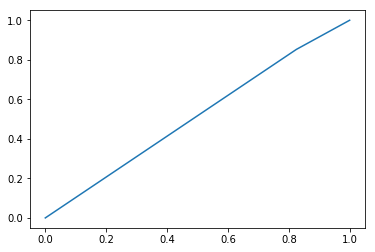

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)
plt.plot(tpr,fpr)
plt.show() 